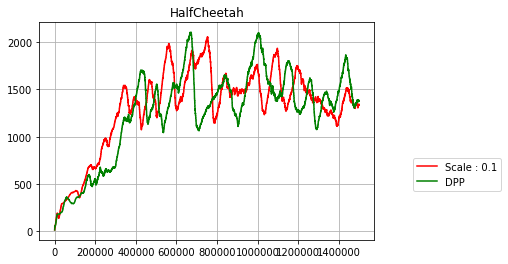

GRAPH1 : Scale : 0.1
    MAX : 2058.055, STEP : 753939        .....100.0%

GRAPH2 : DPP
    MAX : 2105.986, STEP : 672583        .....100.0%



In [12]:
import pickle
import matplotlib.pyplot as plt
import numpy as np


HC1 = ['APM_HalfCheetah_TEST', 'Random', 1]
HC2 = ['APM_HalfCheetah_Test', 'DPP', 1]


HO1 = ['APM_Hopper_Bounded_(64,0.1,0.0001,0.1)', 'Scale : 0.1', 1]
HO2 = ['APM_Hopper_Bounded_(64,0.5,0.0001,0.1)', 'Scale : 0.5', 1]
HO3 = ['APM_Hopper_Bounded_(64,1,0.0001,0.1)', 'Action : 64', 1]

HO4 = ['APM_Hopper_Bounded_(32,64,1,0.0001,0.1)', 'Action : 32', 1]
HO5 = ['APM_Hopper_Bounded_(128,64,1,0.0001,0.1)', 'Action : 128', 1]

HO6 = ['APM_Hopper_DPP_(64,64,0.1,0.0001,0.01)', 'DPP', 1]


WK1 = ['APM_Walker_Bounded_(64,64,0.1,0.0001,0.01))', 'Scale : 0.1', 1]
WK2 = ['APM_Walker_Bounded_(64,64,0.33,0.0001,0.01))', 'Scale : 0.33', 1]
WK3 = ['APM_Walker_Bounded_(64,64,0.5,0.0001,0.01))', 'Scale : 0.5', 1]
WK4 = ['APM_Walker_Bounded_(64,64,1,0.0001,0.01))', 'Scale : 1', 1]


#file_name_list = [HC1, HC2]

#file_name_list = [HO1, HO2, HO3]
#file_name_list = [HO3, HO4, HO5]
file_name_list = [HO1, HO6]

#file_name_list = [WK1, WK2, WK3, WK4]

graph_color = ['r', 'g', 'b', 'y', 'm', 'c']

###############################################################################

max_list = []
max_epi_list = []
epi_list = []

for i in range(len(file_name_list)):
    step_avg_list = []
    global_step_list = []
    
    with open('/home/minjae/Desktop/JOLP/APM/'+file_name_list[i][0]+'_seed'+str(file_name_list[i][2]), 'rb') as fin1:
        step_avg_list = pickle.load(fin1)
    
    with open('/home/minjae/Desktop/JOLP/APM/'+file_name_list[i][0]+'_global__seed'+str(file_name_list[i][2]), 'rb') as fin2:
        global_step_list = pickle.load(fin2)
    
    step_avg_list = np.array(step_avg_list)
    
    steps = global_step_list[-1]
    #steps = min(steps, 1500000)
    step_list = []
    
    step = 0

    for num in range(steps):
        if num == global_step_list[step]:
            step += 1
        step_list.append(step_avg_list[step])
    
    epi_list.append(steps)
    
    x_values = list(range(1, steps + 1))
    y_values = step_list[:]
    
    max_list.append(np.max(step_avg_list))
    max_epi_list.append(global_step_list[np.argmax(step_avg_list)])
    
    plt.plot(x_values, y_values, c=graph_color[i], label=file_name_list[i][1])

    
plt.title('HalfCheetah')
plt.grid(True)
plt.legend(loc=2, bbox_to_anchor=(1.1, 0.4))
plt.show()

for i in range(len(file_name_list)):
    print('GRAPH{} : {}'.format(i+1,file_name_list[i][1]))
    print('    MAX : {}, STEP : {}        .....{}%'.format(round(max_list[i],3),max_epi_list[i],round(epi_list[i]/15000.,1)))
    print('')
